# Relationships Between Economic Variables in Different Regions of the World in 2020

## Introduction 
My goal is to discover relationships between economic variables in 2020 and more specifically answer the following questions:
1. Is there a relationship between a countries HCI score and GDP per capita?
2. What regions of the world tend to have higher HCI scores and GDP per capita?
3. What is the relationship between final consumption expenditure and GDP growth?

As an economics major, I'm interested in analyzing the relationship between a country's HCI score and GDP per capita to understand how investments in human capital affect economic prosperity. Similarly, I want to explore which regions tend to have higher HCI scores and GDP per capita to identify patterns in economic development. Additionally, studying the relationship between final consumption expenditure and GDP growth is essential for understanding how consumer behavior impacts overall economic performance. These analyses help inform policymaking and business strategies aimed at fostering sustainable economic growth and improving living standards worldwide.

I obtained the data that was used for this analysis from Kaggle (https://www.kaggle.com/datasets/sagarnildass/worldbank-economicsdemographics-data?resource=download). This dataset was downloaded from the World bank Data (https://data.worldbank.org/). The data is a data set of demographics in 2020 from the World Bank.

After my research there isn't a specific study or researcher that I can pinpoint who has specifically used World Bank demographic data from 2020. However, numerous researchers, institutions, and organizations regularly utilize World Bank data for various studies, reports, and analyses related to demographics, economics, development, and other fields. 

## Data wrangling: DataFrame Preparation for Visualization and Anlaysis

#### Step 1: Import Packages

First I am going to import all the packages I will use for my data analysis and visualizations.

In [11]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import statistics
import datetime
import seaborn as sns
%matplotlib inline

#### Step 2: Import and Condense DataFrame

In this step I created the DataFrame I will be using to do my analysis. I only kept the columns I needed for my analysis and did not have to do any further data rangling since the data was already clean. However, to make the data easier to work with I will make the column names shorter in the next step.

In [57]:
wb_full_data = pd.read_csv('final_demographics_data.csv')

wb_data = wb_full_data[['country', 'Region',
                        'Final consumption expenditure (annual % growth)',
                        'GDP growth (annual %)',
                        'GDP per capita (constant 2010 US$)',
                        'Human capital index (HCI) (scale 0-1)',
                        'Labor force, total', 'Population growth (annual %)',
                        'Population, total',
                        'Unemployment, total (% of total labor force) (modeled ILO estimate)']]

wb_data.head()

,country,Region,Final consumption expenditure (annual % growth),GDP growth (annual %),GDP per capita (constant 2010 US$),Human capital index (HCI) (scale 0-1),"Labor force, total",Population growth (annual %),"Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Algeria,NorthernAfrica,-3.199239,-5.480992,4362.739536,0.534556,12231916,1.836534,43851043,12.83
1,Argentina,SouthAmerica,-11.709644,-9.905235,8692.708046,0.602145,19191447,0.970054,45376763,11.67
2,Australia,Oceania,-0.524927,-0.284839,56307.280680,0.770240,13452598,1.258698,25687041,6.61
3,Austria,WesternEurope,-6.500544,-6.590410,47008.710430,0.746740,4572356,0.419001,8917205,5.77
4,Bangladesh,SouthernAsia,2.347961,2.375522,1305.259332,0.464036,67225702,1.002774,164689383,5.30


#### Step 3: Add a new column for the Labor Force Participation Rate in each country

I want to analyze the labor force participation rate in each country but the World Bank demographic data does not come with it; however, we can calculate the labor force participation rate in 2020 by dividing the numnber of people in the labor force in each country by the population of each country.

In [13]:
wb_data1['LFPR'] = 100 * wb_data1['Labor Force'] / wb_data1['Population']

wb_data2 = wb_data1.copy()
wb_data2.drop(columns = ['Labor Force'], inplace = True)

wb_data2.head()

,country,region,FCE % growth,GDP % growth,GDPperCap,HCI,Pop % growth,Population,UR,LFPR
0,Algeria,Northern Africa,-3.199239,-5.480992,4362.739536,0.534556,1.836534,43851043,12.83,27.894242
1,Argentina,South America,-11.709644,-9.905235,8692.708046,0.602145,0.970054,45376763,11.67,42.293557
2,Australia,Oceania,-0.524927,-0.284839,56307.280680,0.770240,1.258698,25687041,6.61,52.371147
3,Austria,Western Europe,-6.500544,-6.590410,47008.710430,0.746740,0.419001,8917205,5.77,51.275663
4,Bangladesh,Southern Asia,2.347961,2.375522,1305.259332,0.464036,1.002774,164689383,5.30,40.819694


Additional data wrangling can be found in the Appendix at the end of this report.

## Codebook 
### Variable Descriptions:
- `country`: country for demographic data
- `region`: region of the country for demographic data
- `FCE % growth`: annual final consumption expenditure percent growth
- `GDP % growth`: annual gross domestic product percent growth
- `GDPperCap`: gross domestic product product per capita
- `HCI`: human capital index (scale 0-1)
- `Labor Force`: total labor force (employed + unemployed persons)
- `Pop % growth`: population percent growth
- `Population`: total civilian, noninstitutionalized, working age population 15 and older
- `UR`: unemployement rate (% of total labor force) (modeled ILO estimate)
- `LFPR`: labor force divided by total population

## Visualize the Data: Relationships with Economic Variables in 2020

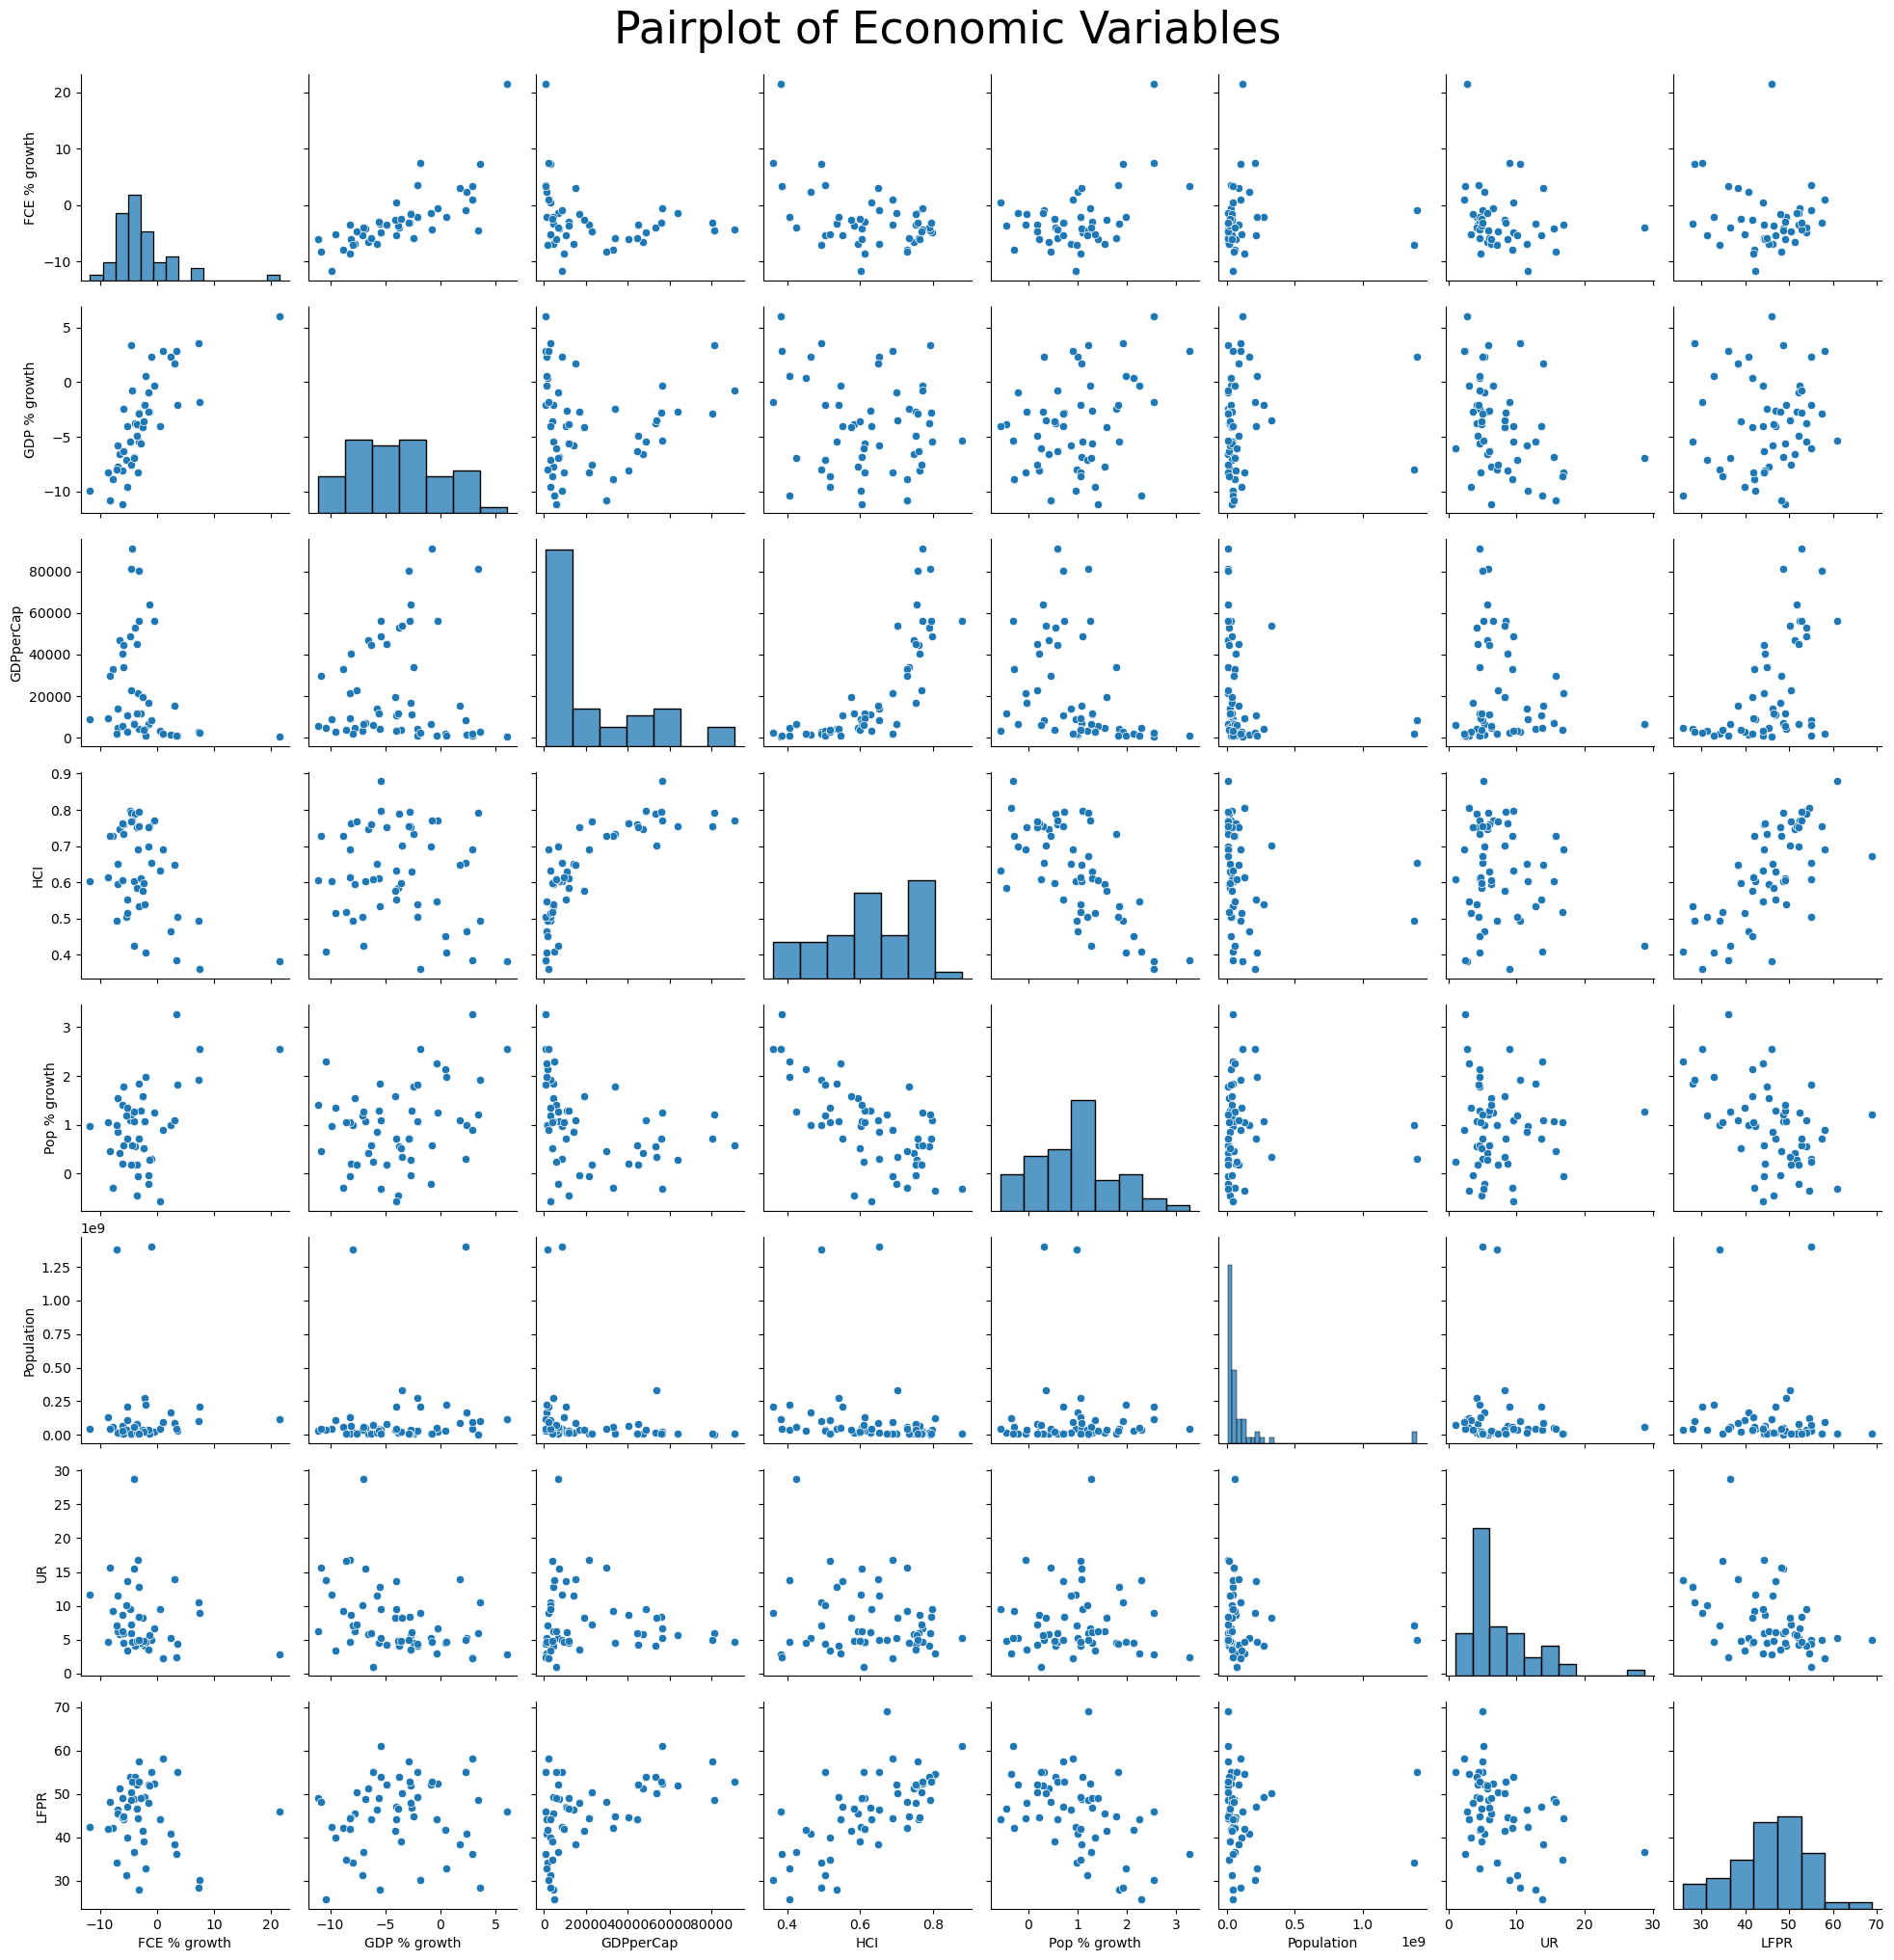

In [21]:
pairplot = sns.pairplot(wb_data2);

plt.suptitle("Pairplot of Economic Variables", y = 1.02, fontsize = 33);

This pairplot shows the relationships between multiple numeric economic factors in 2020 and the univariate distribution of the variables along the diagonal of the grid. These plots on the diagonal of the data set show the distribution of each individual variable in the dataset. Using the pairplot we can directly see strong relationships between certain economic variables in 2020 such as final consumption expenditure growth and GDP growth and the human capital index and GDP per capita. We can also see more mild relationships between economic factors such as GDP per capita and the labor force participation rate and unemployment rates and labor force participation rates. The pairplot also show that some variables may not have any association/relationship between them such as population growth and unemployment rates.

### Heatmap of Correlations Between Economic Variables in 2020

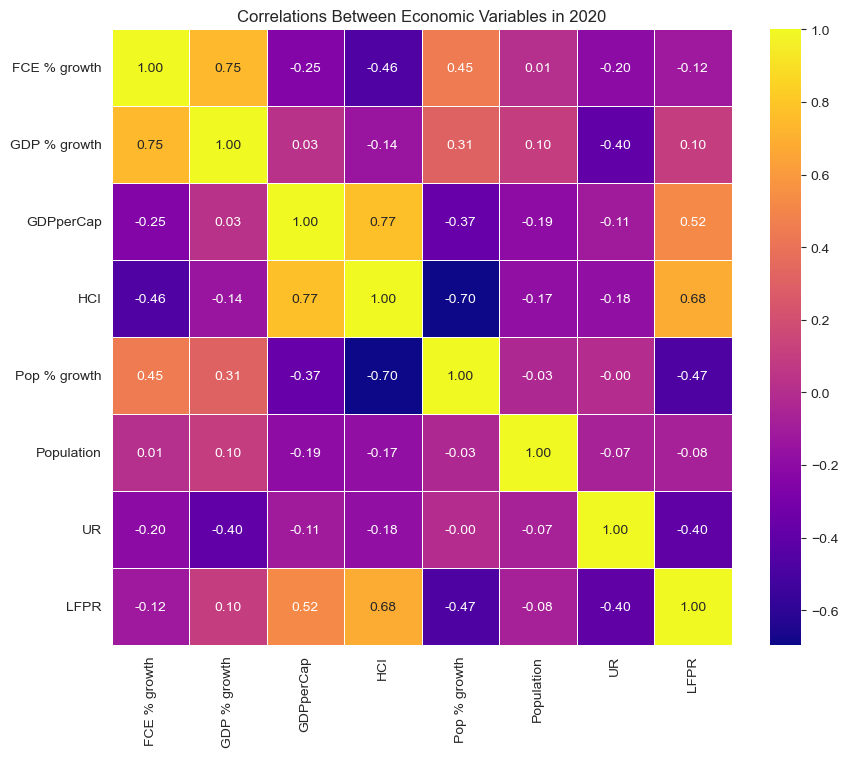

In [263]:
wb_corrs = wb_data2.copy()
wb_corrs.drop(columns = ['country', 'region'], inplace = True)
correlation_matrix = wb_corrs.corr()

plt.figure(figsize = (10, 8))

sns.heatmap(correlation_matrix, annot = True, cmap = 'plasma', fmt = ".2f",
            linewidths = .5)

plt.title('Correlations Between Economic Variables in 2020')

plt.show()

To better see the numerical relationships between the different economic variables in 2020, a heatmap was generated  with annotations corresponding to the correlations between the different variables. From looking at the heatmap we can see a strong correlation of 0.77 between the human capital index and gross domestic product per capita between different countries across the world in 2020. Another strong correlation is one of 0.75 between final consumption expenditure growth and gross domestic product growth. There is also a strong negative correlation between human capital index scores and population growth with a correlation of -0.70. Additionally, from the heatmap we can see that there is a relationship between the labor force participation rate and the human consumer index since the correlation is 0.68. The heatmap also confirms the lack of a relationship between population growth and unemployment rate that we saw in the pairplot since the correlation is approximately 0.

### Figure 1: Relationship between GDP per capita and Human Capital Index

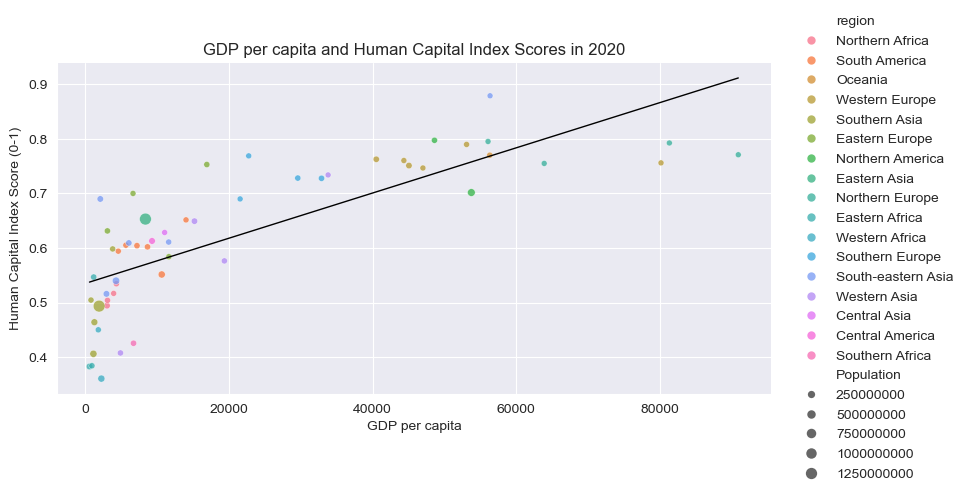

In [58]:
sns.set_style("darkgrid")

fig1 = sns.relplot(wb_data2,
                   x = 'GDPperCap',
                   y = 'HCI',
                   hue = 'region',
                   height = 4,
                   aspect = 2,
                   alpha = 0.75,
                   size = 'Population');

fig1.map(sns.regplot, 'GDPperCap','HCI',
         scatter = False, color = 'k',
         ci = None, line_kws={"linewidth": 1})

plt.title('GDP per capita and Human Capital Index Scores in 2020');
plt.xlabel('GDP per capita');
plt.ylabel('Human Capital Index Score (0-1)');


A closer look at Figure 1, which shows human capital index scores as a function of GDP per capita across countries from around the world, shows a positive relationship between the two variables.

### Figure 2: Relationship Between Final Consumption Expenditure Growth and GDP Growth

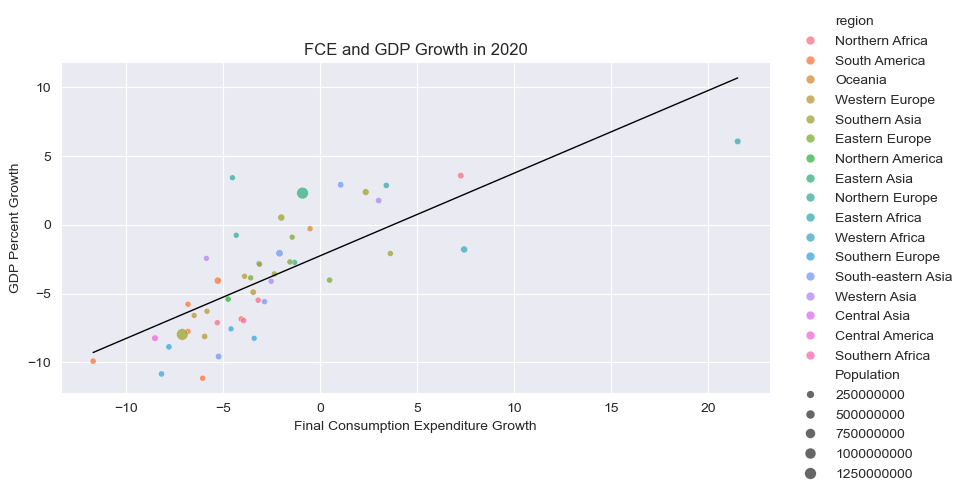

In [59]:
fig2 = sns.relplot(wb_data2,
                   x = 'FCE % growth',
                   y = 'GDP % growth',
                   hue = 'region',
                   height = 4,
                   aspect = 2,
                   alpha = 0.75,
                   size = 'Population');

fig2.map(sns.regplot, 'FCE % growth', 'GDP % growth',
         scatter = False, color = 'k',
         ci = None, line_kws={"linewidth": 1})

plt.title('FCE and GDP Growth in 2020');
plt.xlabel('Final Consumption Expenditure Growth');
plt.ylabel('GDP Percent Growth');


A closer look at Figure 2, which shows GDP growth as a function of final consumption expenditure growth, shows a positive relationship between the two variables.

## Analyses: Extracting Insights of Economic Variables Using Pandas 

In [88]:
# regions with the highest GDP per capita ($)
region_gdp = wb_data2.groupby('region').agg(mean_GDPperCap = ('GDPperCap',
                                                              'mean')).sort_values('mean_GDPperCap',
                                                                                                ascending = False)

new_mean_GDPperCap_name = {'mean_GDPperCap': 'Mean GDP per capita'}
region_gdp = region_gdp.rename(columns = new_mean_GDPperCap_name)

region_gdp.round(2).head()

,Mean GDP per capita
region,
Northern Europe,73032.51
Oceania,56307.28
Western Europe,51694.90
Northern America,51183.03
Southern Europe,26712.28


The regions with the highest average GDP per capita are Northern Europe, Oceania, Western Europe, Northern America, and Southern Europe.

In [73]:
# mean world GDP per capita ($)
print(np.mean(wb_data2['GDPperCap']).round(2))

21457.18


In [89]:
# countries with the highest GDP per capita ($)
country_gdp = wb_data2[['country',
                        'region',
                        'GDPperCap']].sort_values('GDPperCap',
                                                  ascending =  False)

new_GDPperCap_name = {'GDPperCap': 'GDP per capita'}
country_gdp = country_gdp.rename(columns = new_GDPperCap_name)

country_gdp.round(2).head()

,country,region,GDP per capita
35,Norway,Northern Europe,90884.61
23,Ireland,Northern Europe,81297.07
48,Switzerland,Western Europe,80132.43
12,Denmark,Northern Europe,63880.09
43,Singapore,South-eastern Asia,56349.03


The 5 countries with the highest GDP per capita are Norway, Ireland, Switzerland, Denmark, and Singapore.

In [85]:
# regions with the highest HCI score
region_hci = wb_data2.groupby('region').agg(mean_HCI = ('HCI',
                                                        'mean')).sort_values('mean_HCI', ascending = False)

new_mean_name = {'mean_HCI': 'Mean HCI Score'}
region_hci = region_hci.rename(columns = new_mean_name)

region_hci.round(3).head()

,Mean HCI Score
region,
Northern Europe,0.779
Oceania,0.770
Western Europe,0.761
Northern America,0.750
Eastern Asia,0.729


The regions with the highest HCI scores are Northern Europe, Oceania, Western Europe, Northern America, and Eastern Asia.

In [81]:
# countries with the highest HCI score
country_hci = wb_data2[['country',
                        'region',
                        'HCI']].sort_values('HCI',
                                            ascending =  False)
country_hci.round(3).head()

,country,region,HCI
43,Singapore,South-eastern Asia,0.879
26,Japan,Eastern Asia,0.805
8,Canada,Northern America,0.798
47,Sweden,Northern Europe,0.795
23,Ireland,Northern Europe,0.793


The 5 countries with the highest HCI scores are Singapore, Japan, Canada, Sweden, and Ireland.

In [82]:
# countries with the highest GDP growth
country_gdpgrowth = wb_data2[['country',
                              'region',
                              'GDP % growth']].sort_values('GDP % growth',
                                                           ascending =  False)
country_gdpgrowth.round(2).head()

,country,region,GDP % growth
15,Ethiopia,Eastern Africa,6.06
14,Egypt,Northern Africa,3.57
23,Ireland,Northern Europe,3.42
56,Viet Nam,South-eastern Asia,2.91
52,Uganda,Eastern Africa,2.86


The 5 countries with the highest GDP growth are Ethipia, Egypt, Ireland, Viet Nam, and Uganda.

In [92]:
# countries with the highest final consumption expenditure growth
country_fce = wb_data2[['country',
                              'region',
                              'FCE % growth']].sort_values('FCE % growth',
                                                           ascending =  False)
country_fce.round(2).head()

,country,region,FCE % growth
15,Ethiopia,Eastern Africa,21.53
34,Nigeria,Western Africa,7.42
14,Egypt,Northern Africa,7.25
32,Nepal,Southern Asia,3.62
52,Uganda,Eastern Africa,3.41


The 5 countries with the highest final consumption expenditure growth are Ethiopia, Nigeria, Egypt, Nepal, and Uganda.

## Conclusions

From the data visualizations and data analyses, the main questions of the project have been answered as
follows:

1. Is there a relationship between a countries HCI score and GDP per capita?
   
In conclusion, my analysis suggests a positive relationship between a country's Human Capital Index (HCI) score and its GDP per capita in 2020 (correlation coefficient of 0.77). Countries with higher HCI scores tended to have higher GDP per capita levels. This association implies that investments in human capital development, such as education and healthcare, can contribute positively to economic prosperity. The exhibited relationship underscores the importance of prioritizing human capital development initiatives for sustainable economic growth. Nations that prioritize education, healthcare, and workforce development may experience greater productivity and innovation, leading to higher GDP per capita levels. Overall, the findings emphasize the interdependence between human capital investment and economic performance, highlighting the critical role of human development policies in shaping a country's economic trajectory.

2. What regions of the world tend to have higher HCI scores and GDP per capita?
   
In conclusion, my analysis reveals that regions with the highest average GDP per capita include Northern Europe, Oceania, Western Europe, Northern America, and Southern Europe. Among the top-ranking countries in terms of GDP per capita are Norway, Ireland, Switzerland, Denmark, and Singapore. Similarly, regions with the highest Human Capital Index (HCI) scores comprise Northern Europe, Oceania, Western Europe, Northern America, and Eastern Asia. Notably, Singapore, Japan, Canada, Sweden, and Ireland stand out as the top performers in terms of HCI scores. These findings suggest a correlation between regions with strong economic performance and those with robust human capital development, highlighting the significance of investment in education, healthcare, and workforce development for fostering prosperity on a regional scale. The identification of these regions and countries provides valuable insights for policymakers aiming to prioritize initiatives that promote both economic growth and human capital development.

3. What is the relationship between final consumption expenditure and GDP growth?

In conclusion, my analysis indicates a strong positive relationship between final consumption expenditure and GDP growth (correlation coefficient of 0.77). This association is somewhat expected, as in baseline economic theory consumption expenditure is a significant component of GDP, along with investments, government spending, and net exports. When consumption expenditure increases, it often leads to higher overall economic activity, contributing positively to GDP growth. Conversely, a decline in consumption expenditure may signal economic contraction and slower GDP growth. The observed relationship underscores the importance of consumer spending in driving economic expansion, highlighting its role as a key determinant of overall GDP growth. Policymakers and economists can use this insight to better understand and predict fluctuations in economic growth, thereby informing strategic decisions aimed at fostering sustainable development.

### Future Directions
In summary, the analysis has provided valuable insights into the relationship between various economic indicators. Moving forward, one potential direction for further exploration could involve examining the causal mechanisms underlying the observed correlations. Conducting econometric analyses or time-series modeling could help uncover the precise factors driving the relationships between variables such as Human Capital Index (HCI) scores, GDP per capita, final consumption expenditure, and GDP growth. Furthermore, exploring the disparities within regions could offer valuable insights into the effectiveness of specific human capital development strategies and economic policies. By delving deeper into these areas, policymakers can refine their approaches to promoting sustainable economic growth and human development, ultimately leading to more informed decision-making and better outcomes for individuals and societies.

## Reflection
Obtaining a data set with all the information I wanted to analyze was relatively easy as Kaggle was easy to navigate; however, it took a lot of time to find a data set with the exact information I wanted such as HCI scores. The data in the data set I used was mostly clean and I did not need to do any extensive cleaning to it. The data set did not have data for the labor force participation rate ,but I was able to add a new column to the DataFrame and calculate it using the labor force and population data that was already in the data set.

In completing the project, I found creating visualizations easy and effective for conveying data insights. However, I faced difficulty importing data due to different file pathing; however, I was able to utilize ChaptGPT to help me fix any difficulties I had. Although I analyzed population to other economic variables, I didn't include an analysis of this in the conclusion of my report, but I did analyze majority of the relationships through the pairplot of my data. 

After recieving my peer reviews, I fixed all major and minor revision suggestions. For example, I fixed all typos, made axes and title fonts bigger and easier to read, added regression lines to Figures 1 and 2, and adressed correlation coefficients in my heatmap and in my conclusion. Additionally, I tried to the best of my abilities to format all code so that none is cut off in the final project report. In my analysis, I renamed columns for better visual understanding and rounded all numerical values to either two or three decimal places. I also analyzed the correlations I found in my analysis in more depth throughout the entirety of the project report and restated the importance of my findings in the conclusion.

In total, I spent roughly 45 hours on completing this project. Majority of the time spent doing this project was on finding specific data I wanted. Since many of my variables of interest were numerical, it was not very difficult to choose what kind of visualizations I wanted to utilize. I knew I was interested in analyzing the relationships between numerical variables, I knew that I would be using numerous scatter plots and visualizations that can demonstrate numerical correlations such as a heatmap.

## Appendix: Additional Data Wrangling 

#### Rename Columns

I renamed long column names to more precise abbreviations to make working with the data easier. A codebook for the column names can be found after Step 4.

In [69]:
new_column_names = {'Region': 'region',
                    'Final consumption expenditure (annual % growth)': 
                    'FCE % growth',
                    'GDP growth (annual %)': 
                    'GDP % growth',
                    'GDP per capita (constant 2010 US$)': 
                    'GDPperCap',
                    'Human capital index (HCI) (scale 0-1)': 
                    'HCI',
                    'Labor force, total': 
                    'Labor Force',
                    'Population growth (annual %)': 
                    'Pop % growth',
                    'Population, total': 'Population',
                    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 
                    'UR',}
                    
wb_data1 = wb_data.rename(columns = new_column_names)

wb_data1.head()

,country,region,FCE % growth,GDP % growth,GDPperCap,HCI,Labor Force,Pop % growth,Population,UR
0,Algeria,NorthernAfrica,-3.199239,-5.480992,4362.739536,0.534556,12231916,1.836534,43851043,12.83
1,Argentina,SouthAmerica,-11.709644,-9.905235,8692.708046,0.602145,19191447,0.970054,45376763,11.67
2,Australia,Oceania,-0.524927,-0.284839,56307.280680,0.770240,13452598,1.258698,25687041,6.61
3,Austria,WesternEurope,-6.500544,-6.590410,47008.710430,0.746740,4572356,0.419001,8917205,5.77
4,Bangladesh,SouthernAsia,2.347961,2.375522,1305.259332,0.464036,67225702,1.002774,164689383,5.30


#### Add a Space Between Region Names

In this step I used a dictionary to add a space between all unique regions names to make it easier to work with the data.

In [8]:
wb_data1['region'].unique()

array(['NorthernAfrica', 'SouthAmerica', 'Oceania', 'WesternEurope',
       'SouthernAsia', 'EasternEurope', 'NorthernAmerica', 'EasternAsia',
       'NorthernEurope', 'EasternAfrica', 'WesternAfrica',
       'SouthernEurope', 'South-easternAsia', 'WesternAsia',
       'CentralAsia', 'CentralAmerica', 'SouthernAfrica'], dtype=object)

In [70]:
region_spaced = {'NorthernAfrica': 'Northern Africa',
                 'SouthAmerica': 'South America',
                 'Oceania': 'Oceania',
                 'WesternEurope': 'Western Europe',
                 'SouthernAsia': 'Southern Asia',
                 'EasternEurope': 'Eastern Europe',
                 'NorthernAmerica': 'Northern America',
                 'EasternAsia': 'Eastern Asia',
                 'NorthernEurope': 'Northern Europe',
                 'EasternAfrica': 'Eastern Africa',
                 'WesternAfrica': 'Western Africa',
                 'SouthernEurope': 'Southern Europe',
                 'South-easternAsia': 'South-eastern Asia',
                 'WesternAsia': 'Western Asia',
                 'CentralAsia': 'Central Asia',
                 'CentralAmerica': 'Central America',
                 'SouthernAfrica': 'Southern Africa'}

wb_data1['region'].replace(region_spaced, inplace = True)

wb_data1.head()

,country,region,FCE % growth,GDP % growth,GDPperCap,HCI,Labor Force,Pop % growth,Population,UR
0,Algeria,Northern Africa,-3.199239,-5.480992,4362.739536,0.534556,12231916,1.836534,43851043,12.83
1,Argentina,South America,-11.709644,-9.905235,8692.708046,0.602145,19191447,0.970054,45376763,11.67
2,Australia,Oceania,-0.524927,-0.284839,56307.280680,0.770240,13452598,1.258698,25687041,6.61
3,Austria,Western Europe,-6.500544,-6.590410,47008.710430,0.746740,4572356,0.419001,8917205,5.77
4,Bangladesh,Southern Asia,2.347961,2.375522,1305.259332,0.464036,67225702,1.002774,164689383,5.30


# Project Reviews

# Peer Review 1

#### Project writer name: Gaby Lord
#### Project writer email address: gaby.lord@yale.edu

#### Reviewer name: Nathania Nartey
#### Reviwer email address: nathania.nartey@yale.edu

# Summary


World Bank demographics data from 2020 was used to explore potential relationships between economic variables. The three primary things being explored were as follows: the potential presence of a relationship between Human Consumer Index (HCI) scores and GDP per capita; what specific regions of the world tended to have higher GDP per capita and higher HCI scores; if there was a relationships between final consumption expenditure and GDP growth. To develop answers to the aforementioned areas, a pairplot and heatmap were used to visualize any potential corrleations between the economic variables. Additionally, information was extracted from the originally imported data frame. All in all, it was found that there looked to be a positive association between a country's HCI score and its GDP per capita in 2020; the regions with the highest average GDP per captia were Northern Europe, Oceania, Western Europe, North America, and Sourthern Eruope--the countries with the highest HCIs were all the aforementioned except Southern Europe, with Eastern Asia also included; lastly, there was a positive association found between final consumption expenditure and GDP growth. 



## 1. Overall strengths and weaknesses 


I think this project did a great job of creating relevant data visualizations and extracting relevant information from the data frame as well. This project also did a great job of not confusing association for causation. I thought it made a lot of sense that the countries with highest HCIs were from the regions with the highest GDP per capita and I found the explanation how this information could be used to help other countries further develop in the conclusion to be very insightful. I only noticed a few typos, but nothing major!

## 2. Major revisions


- I would suggest bringing the data wrangling and codebook sections to the appendix to ensure that your project is under the 10 page limit
- some of the code is cut off in various coding boxes so I would suggest playing around with the tab feature within each line of code to ensure that all the code is visible


## 3. Minor revisions 


- I'd add a dollar sign in front of the US GDP per capita on pg. 10
- "Ethiopia" typo on pg. 11
- "due" typo on pg. 14




## 3. Rubric score


#### Rubric items where points would be taken off if not addressed: 

I don't think any points would be lost based off what is on the rubric, the only major concerns I have is the page limit and the code being cut off.



### Total score:   90/90





# Peer Review 2

#### Project writer name: Gaby Lord
#### Project writer email address: gaby.lord@yale.ed

#### Reviewer name: Lucas Oland
#### Reviwer email address: lucas.oland@yale.edu

# Summary

Please write a one paragraph (~3-6 sentence) summary of the project here. You should summarize the main goals and findings of the project.

Gaby's project anaylzes the relationship between HCI (Human capital index) and GDP amongst countries in 2020 using a World Bank Data dataset obtained from kaggle. Using pairplot, a heatmap, and relplot, gaby visualized many economic variables to better understand what regions and countries promote higher GDP and HCI, and how their relationship changes between these same regions and countries. She found a positive relationship between HCI and GDP per capita in 2020, opening up a dialogue for how social and governmental reforms contribute to this economic prosperity in leading countries. Future directions include plans to add more relevant variables to the analysis, such as policy interventions, to give more direction to the meaning and 'call to action' of the analysis. 


## 1. Overall strengths and weaknesses 

Please write 1-2 paragraphs that describe overall what you think the strengths and weakness are of the project. In particular, mention what you found interesting about the results, which analyses/visualizations you found convincing, and what could be done to potentially make the project stronger. 

Overall this project is very well thought out and well executed; they used a unique range of visualizations to best show their analysis, and the topic is engaging and relevant. If I had to make any comments, I suppose you could have wrote a little bit about some of the particular insights that could be made from the pairplot, as there are so many plots shown with small writing that makes it hard to understand what I am looking at. The heatmap, on the other hand, felt very easy to look at and understand, projecting the strong relationships of each economic variable in your dataset. Your code was consise, but still due to the large amount of variables/countries you chose to analyze, I believe that the project is currently over the 6-10 page limit. 

I found it particularly interesting that not only was there a strong positive correlation between HCI and GDP, but that not many of the same countries can be found at the top of both groups. For example, only countries in the top 5 of HCI and GDP were Ireland and Singapore. 


## 2. Major revisions

Add bullet points of items that you think should definitely be changed for the final submission of the project. 

 - Decide which areas of analysis need to be shortened / cut to fit the page limit
 - Better justify and explain what you learned from the pair plot analysis

## 3. Minor revisions 

 - Theres a couple places where your code runs off the side of the page that I'm sure would be easy to fix.

## 3. Rubric score

#### Rubric items where points would be taken off if not addressed: 

- Visual appearance of graphs could be improved (pairplot)
- Did not mention outliers or discuss removing
  
### Total score:   88/90


# Peer Review 3

#### Project writer name: Gabrielle Lord
#### Project writer email address: gaby.lord@yale.edu

#### Reviewer name: Nancy Lin
#### Reviwer email address: nancy.lin@yale.edu

# Summary

Gaby's project looked at the relationship between economic variables in different regions of the world in 2020. Specifically, it aimed to see whether there is relationship between a countries HCI score and GDP per capita, what regions of the world tend to have higher HCI scores and GDP per capita, and what the relationship is between final consumption expenditure and GDP growth. Data visualization and analysis found that there is a positive relationship between a country's Human Capital Index (HCI) score and its GDP per capita in 2020, that regions with the highest average GDP per capita include Northern Europe, Oceania, Western Europe, Northern America, and Southern Europe, and that there is a strong positive relationship between final consumption expenditure and GDP growth.


## 1. Overall strengths and weaknesses 

Strengths: Explanations for data wrangling/cleaning were clear and logistical. Starting off with a pairplot was a good idea as it provided a bigger picture view of all potential relationships between different numeric economic factors. Figure 1, which showed the relationship between GDP per capita and Human Capital Index, and Figure 2, which looked at the relationship between final consumption expenditure growth and GDP growth looked very convincing/had a clear correlation and I liked that regions were color-coded and population sizes were size-coded. Analyses extracting insights of economic variables clearly answered the posed questions for the project. I also liked that the questions were included again in the conclusion section, and each were followed up on and directly answered based on the visualizations and analyses done. 


Weaknesses: Code was cut off/partially missing throughout the project. It would be insightful to talk about the strength and characteristics of the positive relationships in Figures 1 and 2 instead of providing a general statement. For example, is the association linear, exponential etc? Is it a strong or weak correlation? Along these lines, it may also help to include a regression line. Minor weaknesses include further polishing, such as reducing decimal points, making sure the titles/labels are easy to read, and renaming columns. For additional analysis, it would be interesting to briefly analyze/discuss which pairs of economic variables are most weakly associated. 


## 2. Major revisions

- Revise format so all of code is showing and not cut-off or missing.
- More in depth discussion of the positive relationship in the visuals Figure 1 and Figure 2.
  

## 3. Minor revisions 

- Make the font size  bigger for the title of the pairplot.
- Add regression lines to Figure 1 and Figure 2.
- For the analyses portion, get the correlation coefficient for the variables investigated in Figure 1/2.
- For the analyses portion, round to fewer decimals points.
- Rename mean_HCI to remove the underscore.
  

## 3. Rubric score

92/100

Introduction: 15/15
Data cleaning: 14/15
Data visualization: 20/25
Analyses: 23/25
Conclusions: 15/15
Reflection: 5/5



#### Rubric items where points would be taken off if not addressed: 

- Code is cut-off or partially missing from view. 
- Lacking discussion of relationship following visuals in Figure 1 and Figure 2.
- Statistics are not rounded in the analyses part.
- Font size of axes or labels are hard to read. 



### Total score:   83/90



